# **<u><center> Data Storm Project </center></u>**
## <u><center> Data pre-processing & wrangling </center></u>

This report represent the process that was used to pre-process and wrangling the data in the Data Storm project. The data was collected from four different tables; evaluation data, historical-transaction data, store-info and testing data. Following steps are used to pre-process data and for data wrangling.

### **1. <u>Data Pre-Processing</u>**

**1.1. Data Loading**

- Load the relevant data to the working environment is the first step of data pre-processing.

In [145]:
import pandas as pd

evaluation_df = pd.read_csv('D:/Uni/5 Semester/Data Wrangling/Data storm/Evaluation-data.csv')
hist_trans_df = pd.read_csv('D:/Uni/5 Semester/Data Wrangling/Data storm/Historical-transaction-data.csv')
store_info_df = pd.read_csv('D:/Uni/5 Semester/Data Wrangling/Data storm/Store-info.csv')
testing_df = pd.read_csv('D:/Uni/5 Semester/Data Wrangling/Data storm/Testing-data.csv')

**1.2. Data Inspection**

- This is to get an idea and an overview about the data and its structre and issues before doing any changes.

In [146]:
# Display evaluation_df
print("Evaluation_df & summary statistics: \n\n",evaluation_df.head())
print(evaluation_df.describe())

# Display hist_trans_df
print("\n Historical Transaction df & summary statistics: \n\n",hist_trans_df.head())
print(hist_trans_df.describe())

# Display store_info_df
print("\n Store Info df & summary statistics: \n\n",store_info_df.head())
print(store_info_df.describe())

# Display testing_df
print("\n Testing df & summary statistics: \n\n", testing_df.head())
print(testing_df.describe())

Evaluation_df & summary statistics: 

    shop_id shop_profile
0  SHOP046          Low
1  SHOP024          Low
2  SHOP023          Low
3  SHOP097     Moderate
4  SHOP044     Moderate
        shop_id shop_profile
count        24           24
unique       24            3
top     SHOP046          Low
freq          1           13

 Historical Transaction df & summary statistics: 

         item_description          transaction_date  invoice_id customer_id  \
0     ORANGE BARLEY 1.5L  2021-12-11T00:00:00.000Z       147.0        BGXA   
1       GINGER BEER 1.5L  2021-10-17T00:00:00.000Z       371.0        IA25   
2        TONIC PET 500ML  2021-12-13T00:00:00.000Z       484.0        VN7V   
3          CREAM SODA 1L  2021-12-13T00:00:00.000Z       484.0        VN7V   
4  STRAWBERRY MILK 180ML  2021-10-23T00:00:00.000Z      1310.0        7S00   

   shop_id  item_price  quantity_sold  
0  SHOP008         220              2  
1  SHOP112         220              2  
2  SHOP008         160        

**1.3. Data Cleaning**

- This is to find and do remedies for missing values.

In [147]:
eval_df_mis = evaluation_df.isnull().sum()
print("Mssing values in evaluation df:\n\n", eval_df_mis)

his_trans_df_mis = hist_trans_df.isnull().sum()
print("\n Mssing values in historical transactions df:\n\n", his_trans_df_mis)

store_info_df_mis = store_info_df.isnull().sum()
print("\n Mssing values in store info df:\n\n", store_info_df_mis)

testing_df_mis = testing_df.isnull().sum()
print("\n Mssing values in testing df:\n\n", testing_df_mis)

Mssing values in evaluation df:

 shop_id         0
shop_profile    0
dtype: int64

 Mssing values in historical transactions df:

 item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

 Mssing values in store info df:

 shop_id             0
shop_area_sq_ft     0
shop_profile       24
dtype: int64

 Mssing values in testing df:

 shop_id          0
shop_profile    24
dtype: int64


- Since the missing values are descriptions and there are enough data to understand and do the analysis we do not need to remove the missing data.

### **2. <u>Data Wrangling</u>**

**2.1. Data Transformation**

- This step is needed to transform the data which make them suitable for analysis.

 **2.1.1. Merge all the tables into one DataFrame** 
  - This will help to gain a comprehensive view of store data.

In [148]:
# Merge tables into a new DataFrame
df1 = pd.merge(evaluation_df, hist_trans_df, on='shop_id')
df2 = pd.merge(df1, store_info_df, on='shop_id')
main_df = pd.merge(df2, testing_df, on='shop_id')

print(main_df.head())

   shop_id shop_profile_x         item_description          transaction_date  \
0  SHOP046            Low     FIT O MIXED FRUIT 1L  2021-10-15T00:00:00.000Z   
1  SHOP046            Low          FIT O ORANGE 1L  2021-10-27T00:00:00.000Z   
2  SHOP046            Low            LEMONADE 1.5L  2021-10-28T00:00:00.000Z   
3  SHOP046            Low        FIT O MANGO 200ML  2021-11-03T00:00:00.000Z   
4  SHOP046            Low  FIT O MIXED FRUIT 200ML  2021-11-03T00:00:00.000Z   

   invoice_id customer_id  item_price  quantity_sold  shop_area_sq_ft  \
0    154826.0        H6RV         270              1              545   
1    157798.0        Z1SZ         290              1              545   
2    157881.0        HFM8         220              2              545   
3    159352.0        RFTZ         180              4              545   
4    159352.0        RFTZ          60              1              545   

  shop_profile_y  shop_profile  
0            NaN           NaN  
1            N

**2.1.2. Create new variables**
 - Sometime there may be missinfg information in the dataset and in a situation like that we can build new variables which may helpful in future analysis using the present data.

In [149]:
# Create new vvariable called "store_perfor" to represent the performance of the stores as "high", "medium", or "low" based on their sales
main_df['store_perfor'] = pd.cut(main_df['quantity_sold'], bins=[0, 10000, 20000, 30000], labels=['low', 'medium', 'high'])

print(main_df.head())

   shop_id shop_profile_x         item_description          transaction_date  \
0  SHOP046            Low     FIT O MIXED FRUIT 1L  2021-10-15T00:00:00.000Z   
1  SHOP046            Low          FIT O ORANGE 1L  2021-10-27T00:00:00.000Z   
2  SHOP046            Low            LEMONADE 1.5L  2021-10-28T00:00:00.000Z   
3  SHOP046            Low        FIT O MANGO 200ML  2021-11-03T00:00:00.000Z   
4  SHOP046            Low  FIT O MIXED FRUIT 200ML  2021-11-03T00:00:00.000Z   

   invoice_id customer_id  item_price  quantity_sold  shop_area_sq_ft  \
0    154826.0        H6RV         270              1              545   
1    157798.0        Z1SZ         290              1              545   
2    157881.0        HFM8         220              2              545   
3    159352.0        RFTZ         180              4              545   
4    159352.0        RFTZ          60              1              545   

  shop_profile_y  shop_profile store_perfor  
0            NaN           NaN    

**2.1.3. Calculate additional metrices**
 - This will allow to summarize the data and provide valuable insights about the overall dataset.

In [150]:
# Aggregate the transaction-data to build a "store-level" matrix like; total quantity sold, customer count, invoice count, etc.

store_matrix = main_df.groupby('shop_id').agg({
    'item_price': 'sum',
    'customer_id': 'nunique',
    'invoice_id': 'nunique'
})

store_matrix.rename(columns={
     'item_price': 'total sales',
    'customer_id': 'customer count',
    'invoice_id': 'invoice count'
}, inplace=True)


# Average transaction & Average items pr transaction matrix.
# Average transaction matirx
store_matrix['avg_transaction_val'] = store_matrix['total sales'] / store_matrix['invoice count']

# Average items per transaction matirx
store_matrix['avg_items_transaction'] = main_df.groupby('shop_id')['quantity_sold'].mean()

print(store_matrix.head())

         total sales  customer count  invoice count  avg_transaction_val  \
shop_id                                                                    
SHOP002      1090135            2577           3769           289.237198   
SHOP019       885265            1922           3045           290.727422   
SHOP023       894740            2227           3138           285.130656   
SHOP024       563095            1641           2302           244.611208   
SHOP029       789280            2052           2875           274.532174   

         avg_items_transaction  
shop_id                         
SHOP002               1.993333  
SHOP019               1.904673  
SHOP023               1.936632  
SHOP024               1.829344  
SHOP029               1.935246  


**2.1.4. Create new features/ insights**
 - Creating new features will enhance the understanding the behavior of the dataset and enable optimizations and target strategies.

In [151]:
# Create a new column for month of the transaction
main_df['trans_month'] = pd.to_datetime(main_df['transaction_date']).dt.month

print(main_df)

       shop_id shop_profile_x         item_description  \
0      SHOP046            Low     FIT O MIXED FRUIT 1L   
1      SHOP046            Low          FIT O ORANGE 1L   
2      SHOP046            Low            LEMONADE 1.5L   
3      SHOP046            Low        FIT O MANGO 200ML   
4      SHOP046            Low  FIT O MIXED FRUIT 200ML   
...        ...            ...                      ...   
86628  SHOP070            Low  CREAM SODA APPLE POP 1L   
86629  SHOP070            Low         GINGER BEER 1.5L   
86630  SHOP070            Low                  SODA 1L   
86631  SHOP070            Low       ORANGE CRUSH 500ML   
86632  SHOP070            Low         GINGER BEER 1.5L   

               transaction_date  invoice_id customer_id  item_price  \
0      2021-10-15T00:00:00.000Z    154826.0        H6RV         270   
1      2021-10-27T00:00:00.000Z    157798.0        Z1SZ         290   
2      2021-10-28T00:00:00.000Z    157881.0        HFM8         220   
3      2021-11-03T0

**2.1.5. Performing data normalizaion/ scalling**
 - This ensure whether the variables are on a comparable scale or not since compare the variables are essential for certain analysis.

In [152]:
from sklearn.preprocessing import MinMaxScaler

main_df = MinMaxScaler(main_df)

print(main_df)

MinMaxScaler(feature_range=       shop_id shop_profile_x         item_description  \
0      SHOP046            Low     FIT O MIXED FRUIT 1L   
1      SHOP046            Low          FIT O ORANGE 1L   
2      SHOP046            Low            LEMONADE 1.5L   
3      SHOP046            Low        FIT O MANGO 200ML   
4      SHOP046            Low  FIT O MIXED FRUIT 200ML   
...        ...            ...                      ...   
86628  SHOP070            Low  CREAM SODA APPLE POP 1L   
86629  SHOP070            Low         GINGER BEER 1.5L   
86630  SHOP070            Low                  SODA 1L   
86631  SHOP070            Low       ORANGE CRUSH 500ML   
86632  SHOP070            Low         GINGER BEER 1.5L   

               t...
86632  2021-12-12T00:00:00.000Z   3898670.0        FFDX         220   

       quantity_sold  shop_area_sq_ft shop_profile_y  shop_profile  \
0                  1              545            NaN           NaN   
1                  1              545       

**2.2. Data Exploration**

- This is to get an idea about the characteristics of the data and gain insights about them by explore pre-processed data.

**2.2.1. Visualize the distributions of main variables**

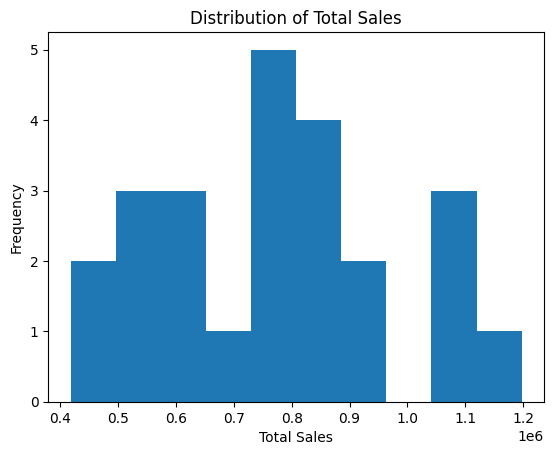

In [153]:
import matplotlib.pyplot as plt 

# Distribution of sales
plt.hist(store_matrix['total sales'], bins=10)
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales')
plt.show()

 - The above histogram shows the distribution of total sales in different stores and most of the stores have low to medium range sale, while a few stores have a higher sale.

**2.2.2. Analyze relationships between variables**

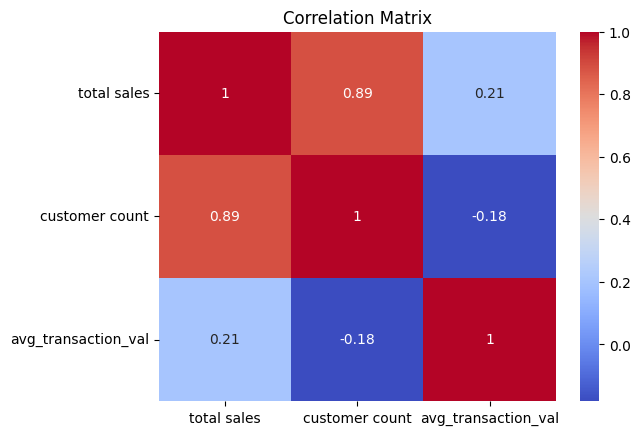

In [154]:
import seaborn as sns

# Correlation matrix
corr_matrix = store_matrix[['total sales', 'customer count', 'avg_transaction_val']].corr()

# Correlation matix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 - The above heatmap shows the correlation matrix between totals sales, customer count and average transaction value. Darker colour represent the stronger + and - correlations. According to that the follwoing interpretations can be given;
 
    - There is a strong positive correlation between total sales and customer count.
    - There is a weak ppsitive correlation of 0.21 between total sales and average transaction value.
    - There is a weak negative correlation between customer count and average transaction value.

**2.2.3. Identify outliers & Summary statistics**

In [155]:
# Calculate IQR
q1 = store_matrix['total sales'].quantile(0.25)
q3 = store_matrix['total sales'].quantile(0.75)

IQR = q3 - q1

# Findings for outliers
outliers = store_matrix[(store_matrix['total sales'] < q1 - 1.5 * IQR) | (store_matrix['total sales'] > q3 + 1.5 * IQR)]

# Print outliers
print("No. of outliers --->", outliers)

# Summary statistics
print(store_matrix.describe())

No. of outliers ---> Empty DataFrame
Columns: [total sales, customer count, invoice count, avg_transaction_val, avg_items_transaction]
Index: []
        total sales  customer count  invoice count  avg_transaction_val  \
count  2.400000e+01        24.00000      24.000000            24.000000   
mean   7.719827e+05      1910.87500    2785.833333           277.198914   
std    2.073814e+05       496.08759     722.863128            18.036904   
min    4.185450e+05       921.00000    1479.000000           244.611208   
25%    6.264062e+05      1640.00000    2334.250000           266.338883   
50%    7.710125e+05      1851.50000    2827.000000           278.594546   
75%    8.876338e+05      2232.00000    3143.250000           289.609754   
max    1.197065e+06      2832.00000    4320.000000           312.007917   

       avg_items_transaction  
count              24.000000  
mean                1.947802  
std                 0.145224  
min                 1.799571  
25%                 1.84

<u>**Data Export**</u>

- This step is to save the pre-processed data as a csv file.

In [156]:
store_matrix.to_csv("pre-processed_data.csv", index=False)